In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway,kruskal

In [6]:
# Load each country's cleaned dataset
benin=pd.read_csv("../data/benin_clean.csv")
sierraleone=pd.read_csv("../data/sierraleone_clean.csv")
togo=pd.read_csv("../data/togo_clean.csv")

# Add country column to each 
benin['Country']='Benin'
sierraleone['Country']='Sierra Leone'  
togo['Country']='Togo'

# Combine into one dataframe
df = pd.concat([benin, sierraleone, togo], ignore_index=True)
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country,Unnamed: 0
0,2021-08-09 00:01,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998.0,0.0,0.0,26.3,26.2,Benin,NaN
1,2021-08-09 00:02,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998.0,0.0,0.0,26.3,26.2,Benin,NaN
2,2021-08-09 00:03,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997.0,0.0,0.0,26.4,26.2,Benin,NaN
3,2021-08-09 00:04,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997.0,0.0,0.0,26.4,26.3,Benin,NaN
4,2021-08-09 00:05,0.0,0.0,0.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997.0,0.0,0.0,26.4,26.3,Benin,NaN


Box Plots

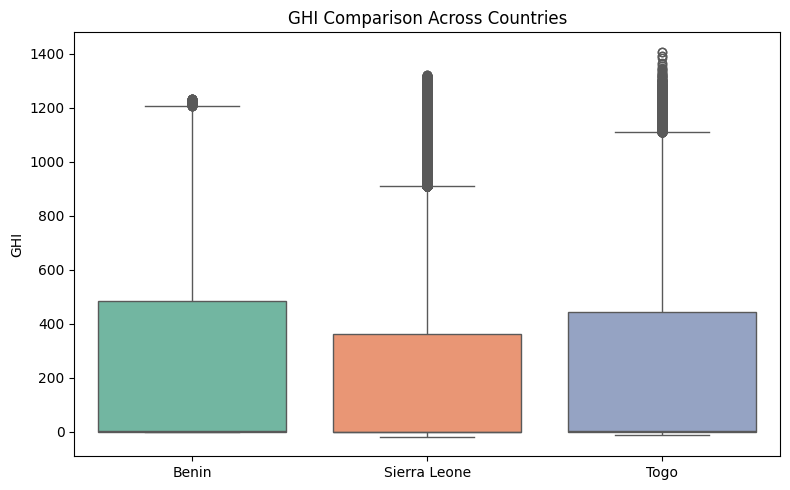

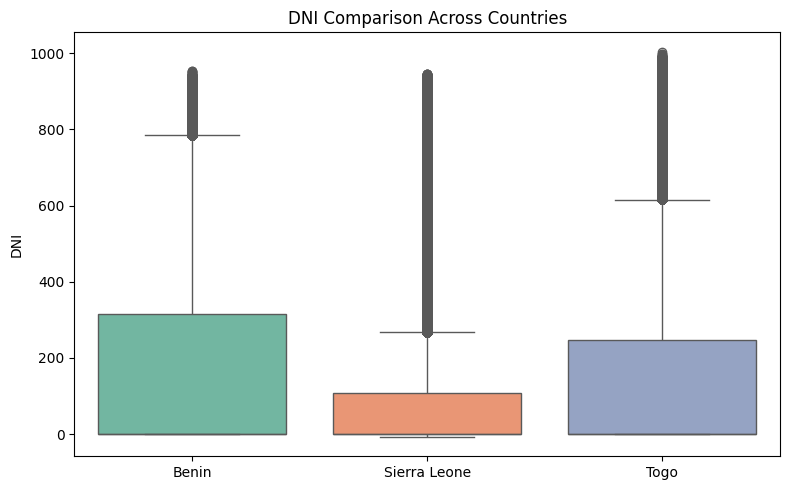

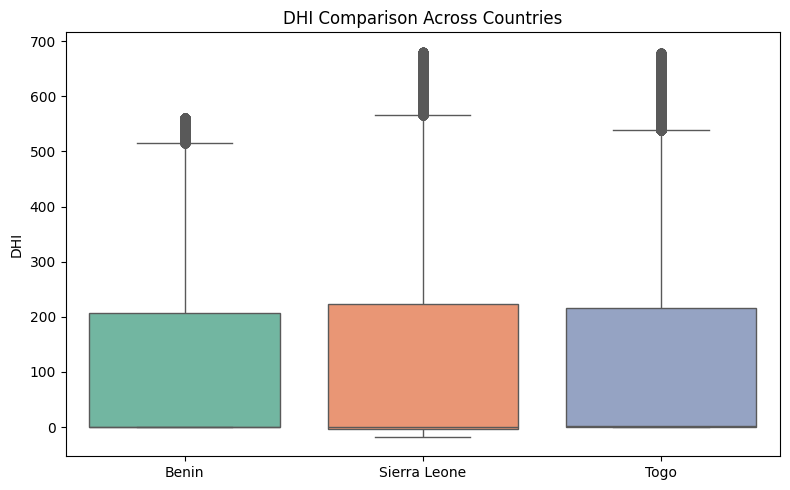

In [8]:
metrics = ['GHI', 'DNI','DHI']

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Country", y=metric, hue="Country", data=df, palette="Set2", legend=False)
    plt.title(f"{metric} Comparison Across Countries")
    plt.xlabel("")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()



Summary Table

In [9]:
summary_table= df.groupby('Country')[["GHI","DNI","DHI"]].agg(["mean","median","std"])
summary_table

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         241.739837    1.8  329.836198  167.441866    0.0  261.547532   
Sierra Leone  201.789588    0.3  298.121137  116.376337   -0.1  218.652659   
Togo          230.545539    2.1  322.512106  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         109.383595    0.2  147.983712  
Sierra Leone  113.358972   -0.1  158.131290  
Togo          116.287979    2.5  156.186419

Statistical Tests

In [10]:
# One-way ANOVA on GHI
anova_result = f_oneway(
    benin["GHI"].dropna(),
    sierraleone["GHI"].dropna(),
    togo["GHI"].dropna()

)

# Kruskal-Wallis test (non-parametric alternative)
kruskal_result = kruskal(
    benin["GHI"].dropna(),
    sierraleone["GHI"].dropna(),
    togo["GHI"].dropna()
)

print("One-way ANOVA p-value:", anova_result.pvalue)
print("Kruskal-Wallis p-value:", kruskal_result.pvalue)

One-way ANOVA p-value: 0.0
Kruskal-Wallis p-value: 0.0


Bar Chart

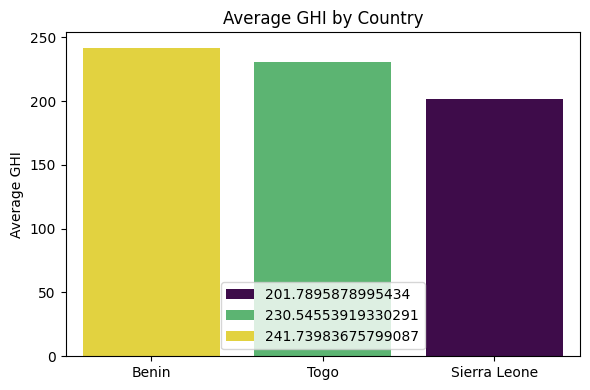

In [13]:
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="viridis", hue=avg_ghi.values)
plt.title("Average GHI by Country")
plt.xlabel("")
plt.ylabel("Average GHI")
plt.tight_layout()
plt.show()
